# 資料準備

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [36]:
from keras.datasets import mnist
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [4]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


# 將images進行預處理

In [23]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [24]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [7]:
# one hot encode outputs
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(filters=16,
kernel_size=(5,5),
padding='same',
input_shape=(28,28,1),
activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(filters=36,
kernel_size=(5,5),
padding='same',
activation='relu'))

In [13]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 36)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20, batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 83s - loss: 0.3629 - acc: 0.8911 - val_loss: 0.0845 - val_acc: 0.9760
Epoch 2/20
 - 86s - loss: 0.1109 - acc: 0.9669 - val_loss: 0.0561 - val_acc: 0.9838
Epoch 3/20
 - 71s - loss: 0.0790 - acc: 0.9764 - val_loss: 0.0475 - val_acc: 0.9863
Epoch 4/20
 - 69s - loss: 0.0636 - acc: 0.9810 - val_loss: 0.0435 - val_acc: 0.9867
Epoch 5/20
 - 85s - loss: 0.0537 - acc: 0.9826 - val_loss: 0.0383 - val_acc: 0.9878
Epoch 6/20
 - 85s - loss: 0.0482 - acc: 0.9856 - val_loss: 0.0373 - val_acc: 0.9889
Epoch 7/20
 - 71s - loss: 0.0403 - acc: 0.9872 - val_loss: 0.0409 - val_acc: 0.9884
Epoch 8/20
 - 81s - loss: 0.0374 - acc: 0.9880 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 9/20
 - 74s - loss: 0.0318 - acc: 0.9901 - val_loss: 0.0327 - val_acc: 0.9901
Epoch 10/20
 - 77s - loss: 0.0306 - acc: 0.9903 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 11/20
 - 85s - loss: 0.0274 - acc: 0.9915 - val_loss: 0

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 1 Axes>

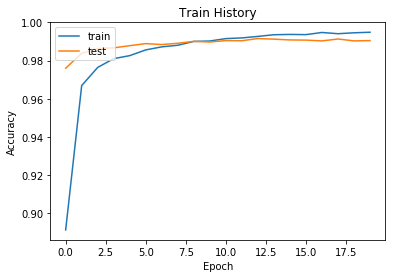

In [28]:
show_train_history('acc','val_acc')

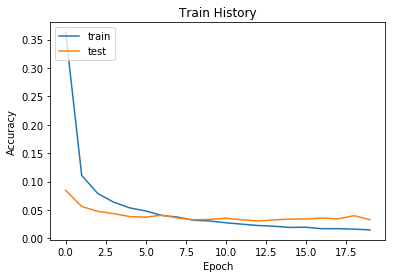

In [27]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 6s 605us/step


0.9922

# 預測結果

In [30]:
prediction=model.predict_classes(x_Test4D_normalize)

In [31]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        ax.set_title("label=" +str(labels[idx])+
        ",predict="+str(prediction[idx])
        ,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

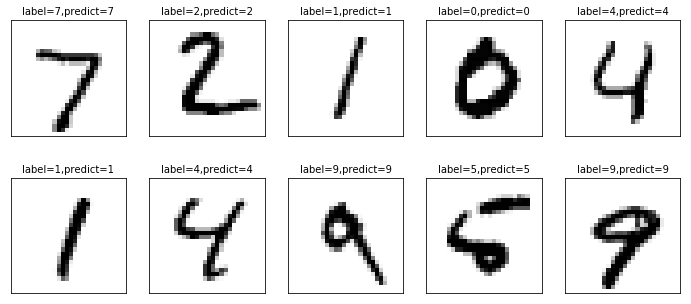

In [37]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [38]:
import pandas as pd

pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,0,1,1
1,0,1127,3,1,0,0,0,1,3,0
2,0,0,1030,0,0,0,0,2,0,0
3,0,0,1,1004,0,4,0,0,1,0
4,0,0,1,0,971,0,4,1,0,5
5,0,0,0,4,0,887,1,0,0,0
6,3,3,0,0,1,3,947,0,1,0
7,0,1,10,3,0,0,0,1011,1,2
8,0,0,1,1,0,1,0,1,969,1


In [40]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2597,5,3
5937,5,3
